<a href="https://colab.research.google.com/github/Dabaiee/CS5100group7/blob/zixuan/group7_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install keras 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Load the data

In [2]:
#1st approach get data from our github
url = 'https://raw.githubusercontent.com/Dabaiee/CS5100group7/main/ETH-USD.csv'
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1828,2022-11-11,1298.882446,1302.295288,1211.329590,1287.221069,1287.221069,20920539099
1829,2022-11-12,1287.438354,1288.150879,1242.152222,1255.268311,1255.268311,10964962767
1830,2022-11-13,1255.441284,1271.712524,1208.520996,1221.819214,1221.819214,10717455214
1831,2022-11-14,1221.895508,1284.217651,1178.429077,1241.604248,1241.604248,15028035663


In [ ]:
# !pip install --upgrade pandas-datareader

# !pip install --upgrade pandas

In [ ]:
#2nd apprroach to get data
#get data from yahoo
# current = dt.datetime.now()
# df = web.DataReader('ETH-USD', data_source='yahoo', start='2016-01-01', end=current)
# df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1833 non-null   object 
 1   Open       1833 non-null   float64
 2   High       1833 non-null   float64
 3   Low        1833 non-null   float64
 4   Close      1833 non-null   float64
 5   Adj Close  1833 non-null   float64
 6   Volume     1833 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.4+ KB


In [4]:
df.shape

(1833, 7)

# Visualization

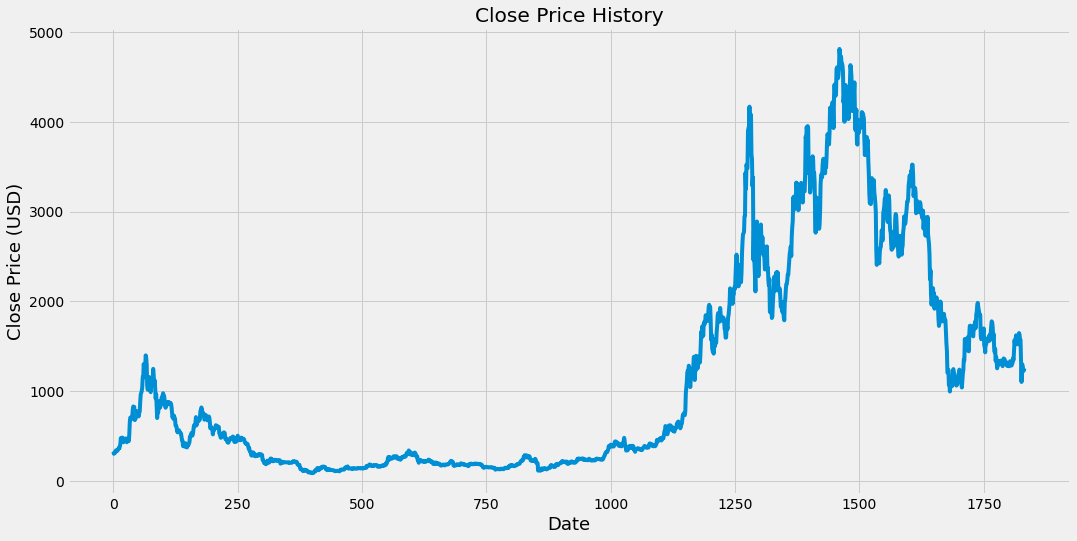

In [5]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.show()

In [10]:
move_average_100 = df.Close.rolling(100).mean()
move_average_100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1828    1507.766302
1829    1504.236928
1830    1499.132573
1831    1494.632035
1832    1490.171121
Name: Close, Length: 1833, dtype: float64

In [11]:
move_average_200 = df.Close.rolling(200).mean()
move_average_200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1828    1606.376496
1829    1598.611346
1830    1590.275794
1831    1581.799110
1832    1573.987398
Name: Close, Length: 1833, dtype: float64

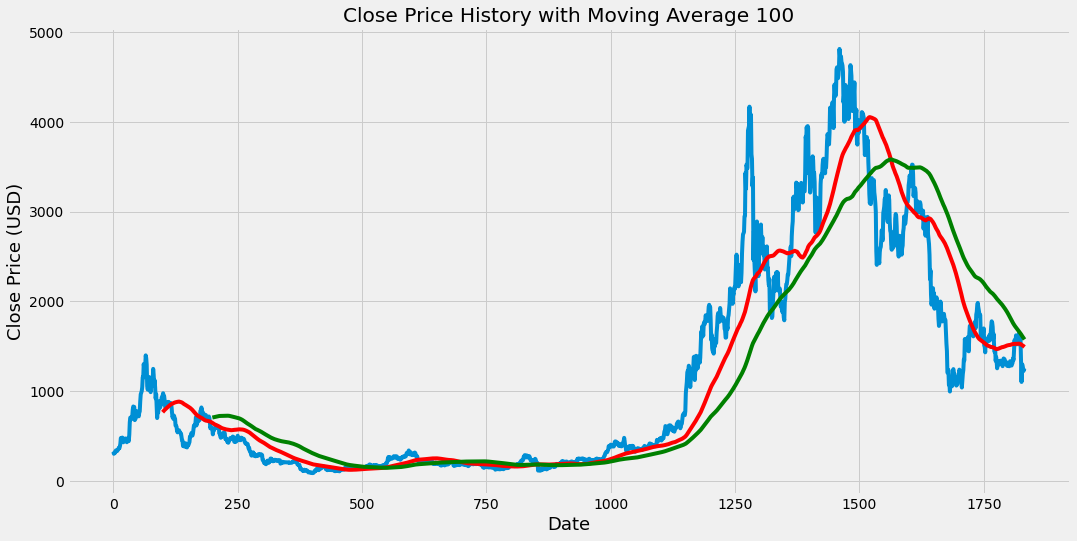

In [13]:
plt.figure(figsize=(16,8))
plt.title('Close Price History with Moving Average 100')
plt.plot(df['Close'])
plt.plot(move_average_100, 'r')
plt.plot(move_average_200, 'g')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.show()


In [ ]:
 #create a new dataframe with 'Close' column
data = df.filter(['Close'])
#convert the dataframe into an array
dataset = data.values
#count number of data to train the model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len


1467

In [ ]:
#Scale the data - it is advantage to pre processing the scaling to input data before neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0500395 ],
       [0.0454642 ],
       [0.04872747],
       ...,
       [0.24060154],
       [0.24478638],
       [0.24725163]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
train_data
#split the data into x_train and y_train data sets
#x_train is train feature
x_train = []
#y_train is target var
y_train = []

#we use past continuously 60 days of x to predict the 61st day of y, 
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  # if i <= 61:
  #   print('x',x_train)
  #   print('y',y_train)
  #   print('.............')

In [ ]:
#convert the x_train and y_train to an array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
#we start at index 59 -> 60th of x
x_train.shape

(1407, 60)

In [ ]:
#LSTM need input to be 3-D (num of samples, num of time steps, num of features) 
#therefore, need to reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1407, 60, 1)

In [ ]:
from keras.engine import input_layer
#build the LSTM model (continuously dataset)
#LSTM is one of the recurrent neural network
model = Sequential()
#use 50 neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
#optimizer is used to improve the loss function (adaptive moment)
#loss function measure the accurate of model on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
#batch size is the total number of training examples present in a single batch
#epochs is the iterations when an entire dataset is passed forward and backward thru a neural netwok
model.fit(x_train, y_train, batch_size=1, epochs=1)

1407/1407 [==============================] - 51s 31ms/step - loss: 0.0022


In [ ]:
#create the testing data set
#create an new array ontained rest of scaled value (0,1)
test_data = scaled_data[training_data_len - 60:, :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

#idea here is we use rest of scaled data （scaled_data * 20%)
#start from index 60 of test_data, in group of 60, and we put 60 numbers into x_test

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
print(len(x_test))
y_test.shape

366


(366, 1)

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.73755278, 0.70101213, 0.70809358, ..., 0.9693361 , 0.96602486,
        0.96071548],
       [0.70101213, 0.70809358, 0.68639833, ..., 0.96602486, 0.96071548,
        0.94615157],
       [0.70809358, 0.68639833, 0.60804133, ..., 0.96071548, 0.94615157,
        0.87399535],
       ...,
       [0.32794398, 0.29345389, 0.2851528 , ..., 0.25702476, 0.25443506,
        0.24767655],
       [0.29345389, 0.2851528 , 0.29304106, ..., 0.25443506, 0.24767655,
        0.24060154],
       [0.2851528 , 0.29304106, 0.26461067, ..., 0.24767655, 0.24060154,
        0.24478638]])

In [ ]:
#reshape the data x_test to 3-D for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the model predicted price values
#use the model with x_test values to get the predicted y
predictions = model.predict(x_test)
#unscalling the values, use inverse the scaled value to noraml value
#we want predictions contain the same values as y_test data set
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 15ms/step


In [ ]:
#evaluate the model preform
#get the root mean squares error(RMSE)
#RMSE is measure of how accurate the model predicts
#RMSE is the standard deviation of the residuals

#predictions: get from model with x_test
#y_test: the actural value from data set
rmse = np.sqrt(np.mean(predictions - y_test)** 2)
rmse

61.423427415748804

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


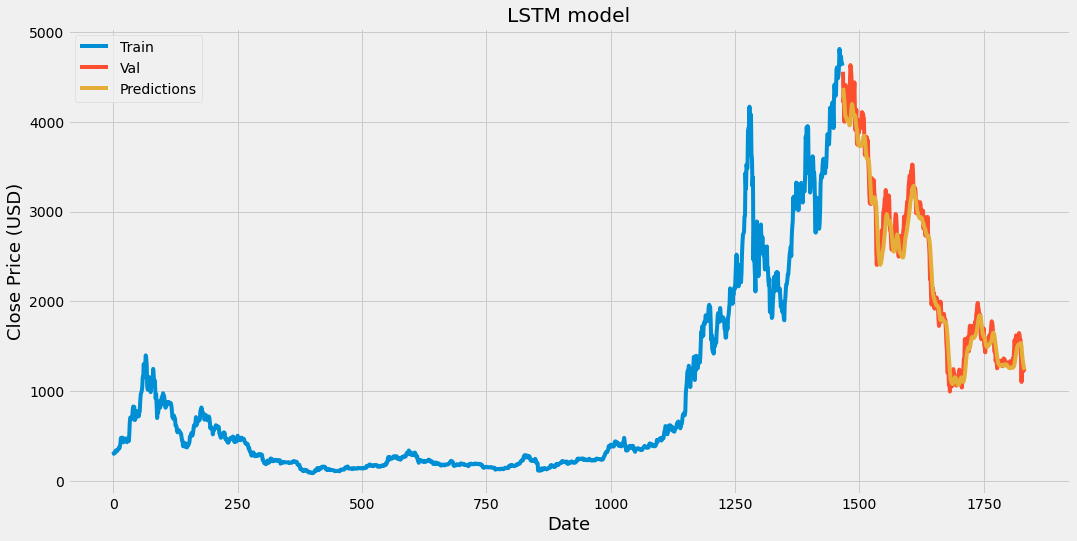

In [ ]:
#plot the data
#80% data as train data
train = data[:training_data_len]
#20% data as valid data
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
# plt.plot(valid['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()


In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
1467,4557.503906,4377.793457
1468,4216.365234,4356.449707
1469,4287.593750,4283.413574
1470,4000.650879,4212.875977
1471,4298.306641,4111.360840
...,...,...
1828,1287.221069,1363.802490
1829,1255.268311,1319.678223
1830,1221.819214,1284.741821
1831,1241.604248,1254.878540


In [ ]:
quote = df
#create the new data frame
new_df = quote.filter(['Close'])
#get last 60 days values and convert them into array to predict the 61st value
last_60 = new_df[-60:].values
#scale the data using scaler (value between 0 and 1)
#use transform for test values instead train values
last_60_scaled = scaler.transform(last_60)
#create x_test_60
x_test_60 = []

x_test_60.append(last_60_scaled)
#convert the x_test_60 to array
x_test_60 = np.array(x_test_60)
#reshape the data to 3-D
x_test_60 = np.reshape(x_test_60, (x_test_60.shape[0], x_test_60.shape[1],1))
#get predicted scaled price by modle and x_test_60
predict_price = model.predict(x_test_60)
#inverse the scaled price to normal price
predict_price = scaler.inverse_transform(predict_price)
print(predict_price) 


1/1 [==============================] - 0s 27ms/step
[[1222.6799]]
